## импорт библиотек

In [ ]:
import torch
import numpy as np
import pandas as pd
import torchvision as tv
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.nn.functional as F
import time
from glob import glob

from tqdm.autonotebook import tqdm
from tqdm import tqdm_notebook
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import classification_report

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

<ipython-input-2-9a884ade8800>:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [ ]:
!unzip /content/drive/MyDrive/olimp/data.zip -d /content/data/

unzip:  cannot find or open /content/drive/MyDrive/olimp/data.zip, /content/drive/MyDrive/olimp/data.zip.zip or /content/drive/MyDrive/olimp/data.zip.ZIP.


## подготовка трейна 

In [ ]:
data = pd.read_csv('/content/train.csv')
data

,имя файла данных,Folder Path,пол,полных лет,пациент off/on,определенный диагноз врачом (0-5)
0,raw_data_d786d645-db38-11ec-b494-e82aea2c97f4.csv,кинетический тремор,мужской,52,off,1
1,raw_data_bdcba44f-0d6a-11ed-8857-b6da2cf29e9d.csv,Постуральный тремор,мужской,78,on,0
2,raw_data_750c0f09-b09a-11ec-9699-58a023d3f6d9.csv,Постуральный тремор,мужской,71,on,0
3,raw_data_d90846c3-3969-11ed-a96d-b469216ca443.csv,кулак,мужской,23,off,1
4,raw_data_c27fbeb3-1882-11ed-95c1-b469216ca443.csv,кинетический тремор,мужской,23,off,2
...,...,...,...,...,...,...
828,raw_data_e454ecdf-6fd9-11ed-8c3e-e82aea2c97f4.csv,Постуральный тремор,мужской,63,on,0
829,raw_data_ed2a29d7-c16e-11ec-b4b8-e82aea2c97f4.csv,Постуральный тремор,женский,66,on,3
830,raw_data_f4a07d6b-64c3-11ed-aa07-e82aea2c97f4.csv,Постуральный тремор,женский,67,off,0
831,raw_data_c00aef37-0d5e-11ed-898c-80847c24eb6e.csv,кинетический тремор,мужской,61,on,0


In [ ]:
data.columns

Index(['имя файла данных', 'Folder Path', 'пол', 'полных лет',
       'пациент off/on', 'определенный диагноз врачом (0-5)'],
      dtype='object')

In [ ]:
data['пол'].value_counts()

мужской    453
женский    362
0           18
Name: пол, dtype: int64

In [ ]:
data['пациент off/on'].value_counts()


off    487
on     346
Name: пациент off/on, dtype: int64

In [ ]:
data['Folder Path'].value_counts()

Постуральный тремор           215
кулак                         199
постукивание пальцами         196
кинетический тремор           162
Пронация и супинация кисти     61
Name: Folder Path, dtype: int64

In [ ]:
# замена (кодирование) пола
data['пол'] = data['пол'].replace('мужской', 0)
data['пол'] = data['пол'].replace('женский', 1)
# замена (кодирование) пациент off/on
data['пациент off/on'] = data['пациент off/on'].replace('off', 0)
data['пациент off/on'] = data['пациент off/on'].replace('on', 1)

In [ ]:
data

,имя файла данных,Folder Path,пол,полных лет,пациент off/on,определенный диагноз врачом (0-5)
0,raw_data_d786d645-db38-11ec-b494-e82aea2c97f4.csv,кинетический тремор,0,52,0,1
1,raw_data_bdcba44f-0d6a-11ed-8857-b6da2cf29e9d.csv,Постуральный тремор,0,78,1,0
2,raw_data_750c0f09-b09a-11ec-9699-58a023d3f6d9.csv,Постуральный тремор,0,71,1,0
3,raw_data_d90846c3-3969-11ed-a96d-b469216ca443.csv,кулак,0,23,0,1
4,raw_data_c27fbeb3-1882-11ed-95c1-b469216ca443.csv,кинетический тремор,0,23,0,2
...,...,...,...,...,...,...
828,raw_data_e454ecdf-6fd9-11ed-8c3e-e82aea2c97f4.csv,Постуральный тремор,0,63,1,0
829,raw_data_ed2a29d7-c16e-11ec-b4b8-e82aea2c97f4.csv,Постуральный тремор,1,66,1,3
830,raw_data_f4a07d6b-64c3-11ed-aa07-e82aea2c97f4.csv,Постуральный тремор,1,67,0,0
831,raw_data_c00aef37-0d5e-11ed-898c-80847c24eb6e.csv,кинетический тремор,0,61,1,0


In [ ]:
# Признак возраст преобразуем в категории, если возраст от 0 до 14 - ребенок (child), 14-18 - подросток (teen), 19 - 60 - взрослый (adult), 61 - 90 - пожилой (elderly)
# функция создает новый столбец с категориями Age_cat (child, teen, adult, elderly)
def age_category(row):
    if  (row['полных лет'] >= 0) & (row['полных лет'] < 15):
        row['Age_cat'] = 'child'
    elif (row['полных лет'] > 14) and row['полных лет'] < 30:
        row['Age_cat'] = 'teen'
    elif row['полных лет'] > 30 and row['полных лет'] < 61:
        row['Age_cat'] = 'adult'
    elif row['полных лет'] > 60 and row['полных лет'] < 90:
        row['Age_cat']  = 'elderly'
    return row

In [ ]:
data = data.apply(age_category, axis = 1)
data

,имя файла данных,Folder Path,пол,полных лет,пациент off/on,определенный диагноз врачом (0-5),Age_cat
0,raw_data_d786d645-db38-11ec-b494-e82aea2c97f4.csv,кинетический тремор,0,52,0,1,adult
1,raw_data_bdcba44f-0d6a-11ed-8857-b6da2cf29e9d.csv,Постуральный тремор,0,78,1,0,elderly
2,raw_data_750c0f09-b09a-11ec-9699-58a023d3f6d9.csv,Постуральный тремор,0,71,1,0,elderly
3,raw_data_d90846c3-3969-11ed-a96d-b469216ca443.csv,кулак,0,23,0,1,teen
4,raw_data_c27fbeb3-1882-11ed-95c1-b469216ca443.csv,кинетический тремор,0,23,0,2,teen
...,...,...,...,...,...,...,...
828,raw_data_e454ecdf-6fd9-11ed-8c3e-e82aea2c97f4.csv,Постуральный тремор,0,63,1,0,elderly
829,raw_data_ed2a29d7-c16e-11ec-b4b8-e82aea2c97f4.csv,Постуральный тремор,1,66,1,3,elderly
830,raw_data_f4a07d6b-64c3-11ed-aa07-e82aea2c97f4.csv,Постуральный тремор,1,67,0,0,elderly
831,raw_data_c00aef37-0d5e-11ed-898c-80847c24eb6e.csv,кинетический тремор,0,61,1,0,elderly


In [ ]:
data['Age_cat'].value_counts()

elderly    525
teen       165
adult      125
child       18
Name: Age_cat, dtype: int64

In [ ]:
# # закодируем значения в столбце пол ('Age_cat')
data = pd.get_dummies (data, columns = ['Age_cat'])
data

,имя файла данных,Folder Path,пол,полных лет,пациент off/on,определенный диагноз врачом (0-5),Age_cat_adult,Age_cat_child,Age_cat_elderly,Age_cat_teen
0,raw_data_d786d645-db38-11ec-b494-e82aea2c97f4.csv,кинетический тремор,0,52,0,1,1,0,0,0
1,raw_data_bdcba44f-0d6a-11ed-8857-b6da2cf29e9d.csv,Постуральный тремор,0,78,1,0,0,0,1,0
2,raw_data_750c0f09-b09a-11ec-9699-58a023d3f6d9.csv,Постуральный тремор,0,71,1,0,0,0,1,0
3,raw_data_d90846c3-3969-11ed-a96d-b469216ca443.csv,кулак,0,23,0,1,0,0,0,1
4,raw_data_c27fbeb3-1882-11ed-95c1-b469216ca443.csv,кинетический тремор,0,23,0,2,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
828,raw_data_e454ecdf-6fd9-11ed-8c3e-e82aea2c97f4.csv,Постуральный тремор,0,63,1,0,0,0,1,0
829,raw_data_ed2a29d7-c16e-11ec-b4b8-e82aea2c97f4.csv,Постуральный тремор,1,66,1,3,0,0,1,0
830,raw_data_f4a07d6b-64c3-11ed-aa07-e82aea2c97f4.csv,Постуральный тремор,1,67,0,0,0,0,1,0
831,raw_data_c00aef37-0d5e-11ed-898c-80847c24eb6e.csv,кинетический тремор,0,61,1,0,0,0,1,0


In [ ]:
# data = pd.get_dummies (data, columns = ['определенный диагноз врачом (0-5)'])
# data

In [ ]:
dftr = pd.read_csv('/content/train_data.csv')
dftr

,имя файла данных,WRIST.x,WRIST.y,WRIST.z,THUMB_CMC.x,THUMB_CMC.y,THUMB_CMC.z,THUMB_MCP.x,THUMB_MCP.y,THUMB_MCP.z,...,PINKY_PIP.x,PINKY_PIP.y,PINKY_PIP.z,PINKY_DIP.x,PINKY_DIP.y,PINKY_DIP.z,PINKY_TIP.x,PINKY_TIP.y,PINKY_TIP.z,TIME
0,raw_data_d786d645-db38-11ec-b494-e82aea2c97f4.csv,0.474426,0.356521,0.0,0.457477,0.332979,0.001877,0.439616,0.315740,-0.003887,...,0.431692,0.355881,-0.038310,0.428599,0.373598,-0.035599,0.428174,0.383885,-0.033508,10.772790
1,raw_data_bdcba44f-0d6a-11ed-8857-b6da2cf29e9d.csv,0.470986,0.725228,0.0,0.444570,0.752236,0.000901,0.418950,0.790904,-0.005450,...,0.476762,0.814136,-0.048974,0.480646,0.840815,-0.048713,0.482621,0.865458,-0.047944,10.518120
2,raw_data_750c0f09-b09a-11ec-9699-58a023d3f6d9.csv,0.681716,0.561563,0.0,0.661277,0.600513,-0.019913,0.647041,0.642124,-0.041087,...,0.761180,0.648565,-0.072640,0.773693,0.686159,-0.075167,0.782883,0.719365,-0.078075,10.318068
3,raw_data_d90846c3-3969-11ed-a96d-b469216ca443.csv,0.588447,0.507086,0.0,0.581456,0.511727,-0.009553,0.570253,0.509860,-0.014355,...,0.546806,0.487096,-0.008942,0.548114,0.495882,-0.009699,0.550511,0.496946,-0.009344,10.070469
4,raw_data_c27fbeb3-1882-11ed-95c1-b469216ca443.csv,0.540714,0.460623,0.0,0.548009,0.446258,0.000027,0.557672,0.437034,-0.002811,...,0.561502,0.471745,-0.022804,0.566432,0.472232,-0.023608,0.570757,0.472745,-0.024146,11.103565
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
828,raw_data_e454ecdf-6fd9-11ed-8c3e-e82aea2c97f4.csv,0.369590,0.561611,0.0,0.395811,0.594551,0.005150,0.415882,0.636727,0.002577,...,0.362922,0.657815,-0.035844,0.364434,0.673112,-0.035011,0.366529,0.683945,-0.034681,10.097775
829,raw_data_ed2a29d7-c16e-11ec-b4b8-e82aea2c97f4.csv,0.497309,0.426710,0.0,0.520728,0.452743,0.000759,0.541534,0.492224,-0.003418,...,0.480602,0.533457,-0.035060,0.479242,0.557219,-0.035799,0.478086,0.577331,-0.036698,10.451946
830,raw_data_f4a07d6b-64c3-11ed-aa07-e82aea2c97f4.csv,0.547563,0.515800,0.0,0.529089,0.536404,-0.003407,0.513834,0.567501,-0.008454,...,0.574150,0.579241,-0.029331,0.580362,0.593170,-0.030087,0.586758,0.608314,-0.030126,10.447763
831,raw_data_c00aef37-0d5e-11ed-898c-80847c24eb6e.csv,0.467025,0.723807,0.0,0.449847,0.712973,0.000990,0.431253,0.720030,-0.002557,...,0.433683,0.774389,-0.034735,0.423888,0.780284,-0.035351,0.415288,0.785784,-0.035681,3.874706


In [ ]:
dftr.describe()

,WRIST.x,WRIST.y,WRIST.z,THUMB_CMC.x,THUMB_CMC.y,THUMB_CMC.z,THUMB_MCP.x,THUMB_MCP.y,THUMB_MCP.z,THUMB_IP.x,...,PINKY_PIP.x,PINKY_PIP.y,PINKY_PIP.z,PINKY_DIP.x,PINKY_DIP.y,PINKY_DIP.z,PINKY_TIP.x,PINKY_TIP.y,PINKY_TIP.z,TIME
count,833.000000,833.000000,833.0,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000,...,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000
mean,0.483262,0.472487,0.0,0.484146,0.471591,-0.007183,0.485217,0.470142,-0.012757,0.485907,...,0.485421,0.466865,-0.022585,0.485912,0.473749,-0.024195,0.486272,0.478708,-0.024949,9.835788
std,0.134606,0.124399,0.0,0.130554,0.129600,0.009460,0.130640,0.140442,0.012461,0.132804,...,0.153479,0.155168,0.023007,0.155360,0.160950,0.023572,0.156719,0.166612,0.024173,1.661162
min,0.165810,0.163061,0.0,0.152779,0.141187,-0.044006,0.128804,0.117272,-0.073071,0.112226,...,0.136346,0.078969,-0.119238,0.125811,0.063785,-0.139437,0.107262,0.049710,-0.155190,1.164790
25%,0.384647,0.381925,0.0,0.389053,0.375508,-0.013369,0.394689,0.361649,-0.018967,0.390948,...,0.372909,0.350119,-0.035173,0.371139,0.353718,-0.036616,0.370896,0.351999,-0.037946,9.785809
50%,0.472804,0.468181,0.0,0.474281,0.467879,-0.004479,0.480452,0.465059,-0.009678,0.482317,...,0.476462,0.463352,-0.024786,0.477026,0.469387,-0.025056,0.475174,0.474239,-0.024812,10.373427
75%,0.590913,0.564273,0.0,0.582073,0.571926,-0.000398,0.578097,0.572666,-0.003876,0.577291,...,0.601362,0.570132,-0.006662,0.603529,0.578447,-0.008821,0.604418,0.586691,-0.009759,10.578745
max,0.885169,0.843952,0.0,0.895052,0.848240,0.027088,0.917564,0.877943,0.033986,0.936902,...,0.943227,0.913159,0.037233,0.954761,0.939003,0.035724,0.964149,0.962288,0.034389,15.280519


In [ ]:
 new_df = data.merge(dftr, how = 'outer')
 new_df

,имя файла данных,Folder Path,пол,полных лет,пациент off/on,определенный диагноз врачом (0-5),Age_cat_adult,Age_cat_child,Age_cat_elderly,Age_cat_teen,...,PINKY_PIP.x,PINKY_PIP.y,PINKY_PIP.z,PINKY_DIP.x,PINKY_DIP.y,PINKY_DIP.z,PINKY_TIP.x,PINKY_TIP.y,PINKY_TIP.z,TIME
0,raw_data_d786d645-db38-11ec-b494-e82aea2c97f4.csv,кинетический тремор,0,52,0,1,1,0,0,0,...,0.431692,0.355881,-0.038310,0.428599,0.373598,-0.035599,0.428174,0.383885,-0.033508,10.772790
1,raw_data_bdcba44f-0d6a-11ed-8857-b6da2cf29e9d.csv,Постуральный тремор,0,78,1,0,0,0,1,0,...,0.476762,0.814136,-0.048974,0.480646,0.840815,-0.048713,0.482621,0.865458,-0.047944,10.518120
2,raw_data_750c0f09-b09a-11ec-9699-58a023d3f6d9.csv,Постуральный тремор,0,71,1,0,0,0,1,0,...,0.761180,0.648565,-0.072640,0.773693,0.686159,-0.075167,0.782883,0.719365,-0.078075,10.318068
3,raw_data_d90846c3-3969-11ed-a96d-b469216ca443.csv,кулак,0,23,0,1,0,0,0,1,...,0.546806,0.487096,-0.008942,0.548114,0.495882,-0.009699,0.550511,0.496946,-0.009344,10.070469
4,raw_data_c27fbeb3-1882-11ed-95c1-b469216ca443.csv,кинетический тремор,0,23,0,2,0,0,0,1,...,0.561502,0.471745,-0.022804,0.566432,0.472232,-0.023608,0.570757,0.472745,-0.024146,11.103565
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
828,raw_data_e454ecdf-6fd9-11ed-8c3e-e82aea2c97f4.csv,Постуральный тремор,0,63,1,0,0,0,1,0,...,0.362922,0.657815,-0.035844,0.364434,0.673112,-0.035011,0.366529,0.683945,-0.034681,10.097775
829,raw_data_ed2a29d7-c16e-11ec-b4b8-e82aea2c97f4.csv,Постуральный тремор,1,66,1,3,0,0,1,0,...,0.480602,0.533457,-0.035060,0.479242,0.557219,-0.035799,0.478086,0.577331,-0.036698,10.451946
830,raw_data_f4a07d6b-64c3-11ed-aa07-e82aea2c97f4.csv,Постуральный тремор,1,67,0,0,0,0,1,0,...,0.574150,0.579241,-0.029331,0.580362,0.593170,-0.030087,0.586758,0.608314,-0.030126,10.447763
831,raw_data_c00aef37-0d5e-11ed-898c-80847c24eb6e.csv,кинетический тремор,0,61,1,0,0,0,1,0,...,0.433683,0.774389,-0.034735,0.423888,0.780284,-0.035351,0.415288,0.785784,-0.035681,3.874706


In [ ]:
new_df.columns

Index(['имя файла данных', 'Folder Path', 'пол', 'полных лет',
       'пациент off/on', 'определенный диагноз врачом (0-5)', 'Age_cat_adult',
       'Age_cat_child', 'Age_cat_elderly', 'Age_cat_teen', 'WRIST.x',
       'WRIST.y', 'WRIST.z', 'THUMB_CMC.x', 'THUMB_CMC.y', 'THUMB_CMC.z',
       'THUMB_MCP.x', 'THUMB_MCP.y', 'THUMB_MCP.z', 'THUMB_IP.x', 'THUMB_IP.y',
       'THUMB_IP.z', 'THUMB_TIP.x', 'THUMB_TIP.y', 'THUMB_TIP.z',
       'INDEX_FINGER_MCP.x', 'INDEX_FINGER_MCP.y', 'INDEX_FINGER_MCP.z',
       'INDEX_FINGER_PIP.x', 'INDEX_FINGER_PIP.y', 'INDEX_FINGER_PIP.z',
       'INDEX_FINGER_DIP.x', 'INDEX_FINGER_DIP.y', 'INDEX_FINGER_DIP.z',
       'INDEX_FINGER_TIP.x', 'INDEX_FINGER_TIP.y', 'INDEX_FINGER_TIP.z',
       'MIDDLE_FINGER_MCP.x', 'MIDDLE_FINGER_MCP.y', 'MIDDLE_FINGER_MCP.z',
       'MIDDLE_FINGER_PIP.x', 'MIDDLE_FINGER_PIP.y', 'MIDDLE_FINGER_PIP.z',
       'MIDDLE_FINGER_DIP.x', 'MIDDLE_FINGER_DIP.y', 'MIDDLE_FINGER_DIP.z',
       'MIDDLE_FINGER_TIP.x', 'MIDDLE_FINGER_TIP

In [ ]:
# закодируем таргет

le = LabelEncoder()
le.fit(new_df['Folder Path'])

NameError: ignored

In [ ]:
le.classes_

array(['Постуральный тремор', 'Пронация и супинация кисти',
       'кинетический тремор', 'кулак', 'постукивание пальцами'],
      dtype=object)

In [ ]:
new_df['target'] =  le.transform(new_df['Folder Path'])

In [ ]:
new_df

,имя файла данных,Folder Path,пол,полных лет,пациент off/on,определенный диагноз врачом (0-5),Age_cat_adult,Age_cat_child,Age_cat_elderly,Age_cat_teen,...,PINKY_PIP.y,PINKY_PIP.z,PINKY_DIP.x,PINKY_DIP.y,PINKY_DIP.z,PINKY_TIP.x,PINKY_TIP.y,PINKY_TIP.z,TIME,target
0,raw_data_d786d645-db38-11ec-b494-e82aea2c97f4.csv,кинетический тремор,0,52,0,1,1,0,0,0,...,0.355881,-0.038310,0.428599,0.373598,-0.035599,0.428174,0.383885,-0.033508,10.772790,2
1,raw_data_bdcba44f-0d6a-11ed-8857-b6da2cf29e9d.csv,Постуральный тремор,0,78,1,0,0,0,1,0,...,0.814136,-0.048974,0.480646,0.840815,-0.048713,0.482621,0.865458,-0.047944,10.518120,0
2,raw_data_750c0f09-b09a-11ec-9699-58a023d3f6d9.csv,Постуральный тремор,0,71,1,0,0,0,1,0,...,0.648565,-0.072640,0.773693,0.686159,-0.075167,0.782883,0.719365,-0.078075,10.318068,0
3,raw_data_d90846c3-3969-11ed-a96d-b469216ca443.csv,кулак,0,23,0,1,0,0,0,1,...,0.487096,-0.008942,0.548114,0.495882,-0.009699,0.550511,0.496946,-0.009344,10.070469,3
4,raw_data_c27fbeb3-1882-11ed-95c1-b469216ca443.csv,кинетический тремор,0,23,0,2,0,0,0,1,...,0.471745,-0.022804,0.566432,0.472232,-0.023608,0.570757,0.472745,-0.024146,11.103565,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
828,raw_data_e454ecdf-6fd9-11ed-8c3e-e82aea2c97f4.csv,Постуральный тремор,0,63,1,0,0,0,1,0,...,0.657815,-0.035844,0.364434,0.673112,-0.035011,0.366529,0.683945,-0.034681,10.097775,0
829,raw_data_ed2a29d7-c16e-11ec-b4b8-e82aea2c97f4.csv,Постуральный тремор,1,66,1,3,0,0,1,0,...,0.533457,-0.035060,0.479242,0.557219,-0.035799,0.478086,0.577331,-0.036698,10.451946,0
830,raw_data_f4a07d6b-64c3-11ed-aa07-e82aea2c97f4.csv,Постуральный тремор,1,67,0,0,0,0,1,0,...,0.579241,-0.029331,0.580362,0.593170,-0.030087,0.586758,0.608314,-0.030126,10.447763,0
831,raw_data_c00aef37-0d5e-11ed-898c-80847c24eb6e.csv,кинетический тремор,0,61,1,0,0,0,1,0,...,0.774389,-0.034735,0.423888,0.780284,-0.035351,0.415288,0.785784,-0.035681,3.874706,2


## подготовка теста

In [ ]:
test = pd.read_csv('/content/test.csv')
test

,имя файла данных,пол,полных лет,пациент off/on,определенный диагноз врачом (0-5)
0,raw_data_61fbeecd-8ef7-11ec-a78a-58a023d3f6d9.csv,женский,69,on,3
1,raw_data_41f438e7-8041-11ed-aa7b-e82aea2c97f4.csv,мужской,23,off,0
2,raw_data_43b5ffcb-2dcc-11ed-a854-e82aea2c97f4.csv,мужской,62,off,0
3,raw_data_28cfe921-2452-11ed-934f-e82aea2c97f4.csv,мужской,72,on,3
4,raw_data_d6107ceb-2f57-11ed-8d23-c86000e163af.csv,мужской,70,off,0
...,...,...,...,...,...
352,raw_data_1fdbcbf9-e072-11ec-9d67-ef54fcc0d655.csv,женский,63,off,1
353,raw_data_83b398f9-2dcc-11ed-91ba-e82aea2c97f4.csv,мужской,62,off,0
354,raw_data_de9b38a1-1882-11ed-b91f-b469216ca443.csv,мужской,23,off,4
355,raw_data_9981a771-0cdd-11ed-9772-b469216ca443.csv,мужской,75,off,2


In [ ]:
# замена (кодирование) пола
test['пол'] = test['пол'].replace('мужской', 0)
test['пол'] = test['пол'].replace('женский', 1)
# замена (кодирование) пациент off/on
test['пациент off/on'] = test['пациент off/on'].replace('off', 0)
test['пациент off/on'] = test['пациент off/on'].replace('on', 1)
test

,имя файла данных,пол,полных лет,пациент off/on,определенный диагноз врачом (0-5)
0,raw_data_61fbeecd-8ef7-11ec-a78a-58a023d3f6d9.csv,1,69,1,3
1,raw_data_41f438e7-8041-11ed-aa7b-e82aea2c97f4.csv,0,23,0,0
2,raw_data_43b5ffcb-2dcc-11ed-a854-e82aea2c97f4.csv,0,62,0,0
3,raw_data_28cfe921-2452-11ed-934f-e82aea2c97f4.csv,0,72,1,3
4,raw_data_d6107ceb-2f57-11ed-8d23-c86000e163af.csv,0,70,0,0
...,...,...,...,...,...
352,raw_data_1fdbcbf9-e072-11ec-9d67-ef54fcc0d655.csv,1,63,0,1
353,raw_data_83b398f9-2dcc-11ed-91ba-e82aea2c97f4.csv,0,62,0,0
354,raw_data_de9b38a1-1882-11ed-b91f-b469216ca443.csv,0,23,0,4
355,raw_data_9981a771-0cdd-11ed-9772-b469216ca443.csv,0,75,0,2


In [ ]:
test = test.apply(age_category, axis = 1)
test

,имя файла данных,пол,полных лет,пациент off/on,определенный диагноз врачом (0-5),Age_cat
0,raw_data_61fbeecd-8ef7-11ec-a78a-58a023d3f6d9.csv,1,69,1,3,elderly
1,raw_data_41f438e7-8041-11ed-aa7b-e82aea2c97f4.csv,0,23,0,0,teen
2,raw_data_43b5ffcb-2dcc-11ed-a854-e82aea2c97f4.csv,0,62,0,0,elderly
3,raw_data_28cfe921-2452-11ed-934f-e82aea2c97f4.csv,0,72,1,3,elderly
4,raw_data_d6107ceb-2f57-11ed-8d23-c86000e163af.csv,0,70,0,0,elderly
...,...,...,...,...,...,...
352,raw_data_1fdbcbf9-e072-11ec-9d67-ef54fcc0d655.csv,1,63,0,1,elderly
353,raw_data_83b398f9-2dcc-11ed-91ba-e82aea2c97f4.csv,0,62,0,0,elderly
354,raw_data_de9b38a1-1882-11ed-b91f-b469216ca443.csv,0,23,0,4,teen
355,raw_data_9981a771-0cdd-11ed-9772-b469216ca443.csv,0,75,0,2,elderly


In [ ]:
test['Age_cat'].value_counts()

elderly    209
teen        79
adult       62
child        7
Name: Age_cat, dtype: int64

In [ ]:
# # закодируем значения в столбце пол ('Age_cat')
test = pd.get_dummies(test, columns = ['Age_cat'])
test

,имя файла данных,пол,полных лет,пациент off/on,определенный диагноз врачом (0-5),Age_cat_adult,Age_cat_child,Age_cat_elderly,Age_cat_teen
0,raw_data_61fbeecd-8ef7-11ec-a78a-58a023d3f6d9.csv,1,69,1,3,0,0,1,0
1,raw_data_41f438e7-8041-11ed-aa7b-e82aea2c97f4.csv,0,23,0,0,0,0,0,1
2,raw_data_43b5ffcb-2dcc-11ed-a854-e82aea2c97f4.csv,0,62,0,0,0,0,1,0
3,raw_data_28cfe921-2452-11ed-934f-e82aea2c97f4.csv,0,72,1,3,0,0,1,0
4,raw_data_d6107ceb-2f57-11ed-8d23-c86000e163af.csv,0,70,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
352,raw_data_1fdbcbf9-e072-11ec-9d67-ef54fcc0d655.csv,1,63,0,1,0,0,1,0
353,raw_data_83b398f9-2dcc-11ed-91ba-e82aea2c97f4.csv,0,62,0,0,0,0,1,0
354,raw_data_de9b38a1-1882-11ed-b91f-b469216ca443.csv,0,23,0,4,0,0,0,1
355,raw_data_9981a771-0cdd-11ed-9772-b469216ca443.csv,0,75,0,2,0,0,1,0


In [ ]:
# # Применим get_dummies для "определенный диагноз врачом (0-5)"
# test = pd.get_dummies(test, columns = ['определенный диагноз врачом (0-5)'])
# test

In [ ]:
dftt = pd.read_csv('/content/test_data.csv')
dftt

,имя файла данных,WRIST.x,WRIST.y,WRIST.z,THUMB_CMC.x,THUMB_CMC.y,THUMB_CMC.z,THUMB_MCP.x,THUMB_MCP.y,THUMB_MCP.z,...,PINKY_PIP.x,PINKY_PIP.y,PINKY_PIP.z,PINKY_DIP.x,PINKY_DIP.y,PINKY_DIP.z,PINKY_TIP.x,PINKY_TIP.y,PINKY_TIP.z,TIME
0,raw_data_61fbeecd-8ef7-11ec-a78a-58a023d3f6d9.csv,0.255863,0.579335,0.0,0.272844,0.548631,-0.011769,0.280440,0.503485,-0.013950,...,0.234209,0.420760,-0.005047,0.230889,0.397486,-0.008603,0.227497,0.376530,-0.011181,5.979599
1,raw_data_41f438e7-8041-11ed-aa7b-e82aea2c97f4.csv,0.418520,0.487395,0.0,0.437952,0.511528,0.001546,0.454995,0.542182,-0.004037,...,0.419514,0.548309,-0.042731,0.423058,0.566279,-0.042627,0.426090,0.579300,-0.042171,10.361516
2,raw_data_43b5ffcb-2dcc-11ed-a854-e82aea2c97f4.csv,0.474775,0.423317,0.0,0.442175,0.455745,0.001114,0.412258,0.481126,-0.004354,...,0.478494,0.477126,-0.043887,0.475586,0.499475,-0.041622,0.471721,0.517522,-0.039065,10.207649
3,raw_data_28cfe921-2452-11ed-934f-e82aea2c97f4.csv,0.536183,0.702857,0.0,0.564204,0.698386,0.016143,0.579524,0.681493,0.021030,...,0.589536,0.634370,-0.015841,0.601529,0.644141,-0.015442,0.608953,0.653642,-0.015954,8.112292
4,raw_data_d6107ceb-2f57-11ed-8d23-c86000e163af.csv,0.267455,0.544556,0.0,0.276686,0.504679,-0.000594,0.291872,0.470372,-0.007868,...,0.295090,0.499038,-0.043808,0.303528,0.507416,-0.038894,0.306380,0.512526,-0.034337,9.697934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,raw_data_1fdbcbf9-e072-11ec-9d67-ef54fcc0d655.csv,0.232570,0.522144,0.0,0.224290,0.542775,-0.018819,0.211298,0.550993,-0.025691,...,0.187501,0.505421,0.006521,0.186065,0.515488,0.004534,0.187042,0.519370,0.003346,10.644290
353,raw_data_83b398f9-2dcc-11ed-91ba-e82aea2c97f4.csv,0.432942,0.436353,0.0,0.419965,0.426439,-0.002772,0.406358,0.429334,-0.008707,...,0.415285,0.468824,-0.033404,0.407960,0.480148,-0.032372,0.401623,0.488609,-0.031513,10.012002
354,raw_data_de9b38a1-1882-11ed-b91f-b469216ca443.csv,0.675450,0.504798,0.0,0.659978,0.495477,0.002750,0.645051,0.495405,0.001416,...,0.652204,0.525602,-0.021583,0.646885,0.528965,-0.022715,0.642233,0.532375,-0.023548,11.065553
355,raw_data_9981a771-0cdd-11ed-9772-b469216ca443.csv,0.333978,0.530422,0.0,0.347990,0.542663,-0.001618,0.359905,0.565186,-0.005058,...,0.318871,0.578794,-0.024838,0.317346,0.594279,-0.025947,0.316356,0.607968,-0.026553,11.326773


In [ ]:
 new_test = test.merge(dftt, how = 'outer')
 new_test

,имя файла данных,пол,полных лет,пациент off/on,определенный диагноз врачом (0-5),Age_cat_adult,Age_cat_child,Age_cat_elderly,Age_cat_teen,WRIST.x,...,PINKY_PIP.x,PINKY_PIP.y,PINKY_PIP.z,PINKY_DIP.x,PINKY_DIP.y,PINKY_DIP.z,PINKY_TIP.x,PINKY_TIP.y,PINKY_TIP.z,TIME
0,raw_data_61fbeecd-8ef7-11ec-a78a-58a023d3f6d9.csv,1,69,1,3,0,0,1,0,0.255863,...,0.234209,0.420760,-0.005047,0.230889,0.397486,-0.008603,0.227497,0.376530,-0.011181,5.979599
1,raw_data_41f438e7-8041-11ed-aa7b-e82aea2c97f4.csv,0,23,0,0,0,0,0,1,0.418520,...,0.419514,0.548309,-0.042731,0.423058,0.566279,-0.042627,0.426090,0.579300,-0.042171,10.361516
2,raw_data_43b5ffcb-2dcc-11ed-a854-e82aea2c97f4.csv,0,62,0,0,0,0,1,0,0.474775,...,0.478494,0.477126,-0.043887,0.475586,0.499475,-0.041622,0.471721,0.517522,-0.039065,10.207649
3,raw_data_28cfe921-2452-11ed-934f-e82aea2c97f4.csv,0,72,1,3,0,0,1,0,0.536183,...,0.589536,0.634370,-0.015841,0.601529,0.644141,-0.015442,0.608953,0.653642,-0.015954,8.112292
4,raw_data_d6107ceb-2f57-11ed-8d23-c86000e163af.csv,0,70,0,0,0,0,1,0,0.267455,...,0.295090,0.499038,-0.043808,0.303528,0.507416,-0.038894,0.306380,0.512526,-0.034337,9.697934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,raw_data_1fdbcbf9-e072-11ec-9d67-ef54fcc0d655.csv,1,63,0,1,0,0,1,0,0.232570,...,0.187501,0.505421,0.006521,0.186065,0.515488,0.004534,0.187042,0.519370,0.003346,10.644290
353,raw_data_83b398f9-2dcc-11ed-91ba-e82aea2c97f4.csv,0,62,0,0,0,0,1,0,0.432942,...,0.415285,0.468824,-0.033404,0.407960,0.480148,-0.032372,0.401623,0.488609,-0.031513,10.012002
354,raw_data_de9b38a1-1882-11ed-b91f-b469216ca443.csv,0,23,0,4,0,0,0,1,0.675450,...,0.652204,0.525602,-0.021583,0.646885,0.528965,-0.022715,0.642233,0.532375,-0.023548,11.065553
355,raw_data_9981a771-0cdd-11ed-9772-b469216ca443.csv,0,75,0,2,0,0,1,0,0.333978,...,0.318871,0.578794,-0.024838,0.317346,0.594279,-0.025947,0.316356,0.607968,-0.026553,11.326773


## обучение

### разделение на выборки

In [ ]:
new_df.columns

Index(['имя файла данных', 'Folder Path', 'пол', 'полных лет',
       'пациент off/on', 'определенный диагноз врачом (0-5)', 'Age_cat_adult',
       'Age_cat_child', 'Age_cat_elderly', 'Age_cat_teen', 'WRIST.x',
       'WRIST.y', 'WRIST.z', 'THUMB_CMC.x', 'THUMB_CMC.y', 'THUMB_CMC.z',
       'THUMB_MCP.x', 'THUMB_MCP.y', 'THUMB_MCP.z', 'THUMB_IP.x', 'THUMB_IP.y',
       'THUMB_IP.z', 'THUMB_TIP.x', 'THUMB_TIP.y', 'THUMB_TIP.z',
       'INDEX_FINGER_MCP.x', 'INDEX_FINGER_MCP.y', 'INDEX_FINGER_MCP.z',
       'INDEX_FINGER_PIP.x', 'INDEX_FINGER_PIP.y', 'INDEX_FINGER_PIP.z',
       'INDEX_FINGER_DIP.x', 'INDEX_FINGER_DIP.y', 'INDEX_FINGER_DIP.z',
       'INDEX_FINGER_TIP.x', 'INDEX_FINGER_TIP.y', 'INDEX_FINGER_TIP.z',
       'MIDDLE_FINGER_MCP.x', 'MIDDLE_FINGER_MCP.y', 'MIDDLE_FINGER_MCP.z',
       'MIDDLE_FINGER_PIP.x', 'MIDDLE_FINGER_PIP.y', 'MIDDLE_FINGER_PIP.z',
       'MIDDLE_FINGER_DIP.x', 'MIDDLE_FINGER_DIP.y', 'MIDDLE_FINGER_DIP.z',
       'MIDDLE_FINGER_TIP.x', 'MIDDLE_FINGER_TIP

In [ ]:
# отбор столбцов
# категориальные колонки :
#  ['пациент off/on', 'определенный диагноз врачом (0-5)', 'Age_cat_adult', 'Age_cat_child', 'Age_cat_elderly', 'Age_cat_teen']

X1 = new_df[['пациент off/on', 'определенный диагноз врачом (0-5)', 'Age_cat_adult',
       'Age_cat_child', 'Age_cat_elderly', 'Age_cat_teen']]
X2 = new_df[['WRIST.x',
       'WRIST.y', 'WRIST.z', 'THUMB_CMC.x', 'THUMB_CMC.y', 'THUMB_CMC.z',
       'THUMB_MCP.x', 'THUMB_MCP.y', 'THUMB_MCP.z', 'THUMB_IP.x', 'THUMB_IP.y',
       'THUMB_IP.z', 'THUMB_TIP.x', 'THUMB_TIP.y', 'THUMB_TIP.z',
       'INDEX_FINGER_MCP.x', 'INDEX_FINGER_MCP.y', 'INDEX_FINGER_MCP.z',
       'INDEX_FINGER_PIP.x', 'INDEX_FINGER_PIP.y', 'INDEX_FINGER_PIP.z',
       'INDEX_FINGER_DIP.x', 'INDEX_FINGER_DIP.y', 'INDEX_FINGER_DIP.z',
       'INDEX_FINGER_TIP.x', 'INDEX_FINGER_TIP.y', 'INDEX_FINGER_TIP.z',
       'MIDDLE_FINGER_MCP.x', 'MIDDLE_FINGER_MCP.y', 'MIDDLE_FINGER_MCP.z',
       'MIDDLE_FINGER_PIP.x', 'MIDDLE_FINGER_PIP.y', 'MIDDLE_FINGER_PIP.z',
       'MIDDLE_FINGER_DIP.x', 'MIDDLE_FINGER_DIP.y', 'MIDDLE_FINGER_DIP.z',
       'MIDDLE_FINGER_TIP.x', 'MIDDLE_FINGER_TIP.y', 'MIDDLE_FINGER_TIP.z',
       'RING_FINGER_MCP.x', 'RING_FINGER_MCP.y', 'RING_FINGER_MCP.z',
       'RING_FINGER_PIP.x', 'RING_FINGER_PIP.y', 'RING_FINGER_PIP.z',
       'RING_FINGER_DIP.x', 'RING_FINGER_DIP.y', 'RING_FINGER_DIP.z',
       'RING_FINGER_TIP.x', 'RING_FINGER_TIP.y', 'RING_FINGER_TIP.z',
       'PINKY_MCP.x', 'PINKY_MCP.y', 'PINKY_MCP.z', 'PINKY_PIP.x',
       'PINKY_PIP.y', 'PINKY_PIP.z', 'PINKY_DIP.x', 'PINKY_DIP.y',
       'PINKY_DIP.z', 'PINKY_TIP.x', 'PINKY_TIP.y', 'PINKY_TIP.z']]

y = new_df['target']

In [ ]:
X1 = np.asarray(X1)
sc = StandardScaler()
X2 = sc.fit_transform(X2) # нормализация столбцов с координатами
X = np.hstack([X1, X2])
X

array([[ 0.        ,  1.        ,  1.        , ..., -0.37093864,
        -0.56946849, -0.3542992 ],
       [ 1.        ,  0.        ,  0.        , ..., -0.02331347,
         2.32266071, -0.9518785 ],
       [ 1.        ,  0.        ,  0.        , ...,  1.89376044,
         1.44528587, -2.19909596],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.64156556,
         0.77835795, -0.21429995],
       [ 1.        ,  0.        ,  0.        , ..., -0.45321165,
         1.84417179, -0.4442548 ],
       [ 0.        ,  0.        ,  0.        , ...,  1.05329594,
         0.88804266, -0.22468807]])

In [ ]:
X.shape

(833, 69)

In [ ]:
# делим на тест и валидац.
X_train, X_val, y_train, y_val =  train_test_split(X, y, test_size=0.2, random_state=42) # разделение на тестовую и тренировочную выборки

In [ ]:
new_test.columns

Index(['имя файла данных', 'пол', 'полных лет', 'пациент off/on',
       'определенный диагноз врачом (0-5)', 'Age_cat_adult', 'Age_cat_child',
       'Age_cat_elderly', 'Age_cat_teen', 'WRIST.x', 'WRIST.y', 'WRIST.z',
       'THUMB_CMC.x', 'THUMB_CMC.y', 'THUMB_CMC.z', 'THUMB_MCP.x',
       'THUMB_MCP.y', 'THUMB_MCP.z', 'THUMB_IP.x', 'THUMB_IP.y', 'THUMB_IP.z',
       'THUMB_TIP.x', 'THUMB_TIP.y', 'THUMB_TIP.z', 'INDEX_FINGER_MCP.x',
       'INDEX_FINGER_MCP.y', 'INDEX_FINGER_MCP.z', 'INDEX_FINGER_PIP.x',
       'INDEX_FINGER_PIP.y', 'INDEX_FINGER_PIP.z', 'INDEX_FINGER_DIP.x',
       'INDEX_FINGER_DIP.y', 'INDEX_FINGER_DIP.z', 'INDEX_FINGER_TIP.x',
       'INDEX_FINGER_TIP.y', 'INDEX_FINGER_TIP.z', 'MIDDLE_FINGER_MCP.x',
       'MIDDLE_FINGER_MCP.y', 'MIDDLE_FINGER_MCP.z', 'MIDDLE_FINGER_PIP.x',
       'MIDDLE_FINGER_PIP.y', 'MIDDLE_FINGER_PIP.z', 'MIDDLE_FINGER_DIP.x',
       'MIDDLE_FINGER_DIP.y', 'MIDDLE_FINGER_DIP.z', 'MIDDLE_FINGER_TIP.x',
       'MIDDLE_FINGER_TIP.y', 'MIDDLE_FI

In [ ]:
X1_test = new_test[['пациент off/on', 'определенный диагноз врачом (0-5)', 'Age_cat_adult',
       'Age_cat_child', 'Age_cat_elderly', 'Age_cat_teen']]

X2_test = new_test[['WRIST.x',
       'WRIST.y', 'WRIST.z', 'THUMB_CMC.x', 'THUMB_CMC.y', 'THUMB_CMC.z',
       'THUMB_MCP.x', 'THUMB_MCP.y', 'THUMB_MCP.z', 'THUMB_IP.x', 'THUMB_IP.y',
       'THUMB_IP.z', 'THUMB_TIP.x', 'THUMB_TIP.y', 'THUMB_TIP.z',
       'INDEX_FINGER_MCP.x', 'INDEX_FINGER_MCP.y', 'INDEX_FINGER_MCP.z',
       'INDEX_FINGER_PIP.x', 'INDEX_FINGER_PIP.y', 'INDEX_FINGER_PIP.z',
       'INDEX_FINGER_DIP.x', 'INDEX_FINGER_DIP.y', 'INDEX_FINGER_DIP.z',
       'INDEX_FINGER_TIP.x', 'INDEX_FINGER_TIP.y', 'INDEX_FINGER_TIP.z',
       'MIDDLE_FINGER_MCP.x', 'MIDDLE_FINGER_MCP.y', 'MIDDLE_FINGER_MCP.z',
       'MIDDLE_FINGER_PIP.x', 'MIDDLE_FINGER_PIP.y', 'MIDDLE_FINGER_PIP.z',
       'MIDDLE_FINGER_DIP.x', 'MIDDLE_FINGER_DIP.y', 'MIDDLE_FINGER_DIP.z',
       'MIDDLE_FINGER_TIP.x', 'MIDDLE_FINGER_TIP.y', 'MIDDLE_FINGER_TIP.z',
       'RING_FINGER_MCP.x', 'RING_FINGER_MCP.y', 'RING_FINGER_MCP.z',
       'RING_FINGER_PIP.x', 'RING_FINGER_PIP.y', 'RING_FINGER_PIP.z',
       'RING_FINGER_DIP.x', 'RING_FINGER_DIP.y', 'RING_FINGER_DIP.z',
       'RING_FINGER_TIP.x', 'RING_FINGER_TIP.y', 'RING_FINGER_TIP.z',
       'PINKY_MCP.x', 'PINKY_MCP.y', 'PINKY_MCP.z', 'PINKY_PIP.x',
       'PINKY_PIP.y', 'PINKY_PIP.z', 'PINKY_DIP.x', 'PINKY_DIP.y',
       'PINKY_DIP.z', 'PINKY_TIP.x', 'PINKY_TIP.y', 'PINKY_TIP.z']]


In [ ]:
len(X2_test)

357

In [ ]:
X1_test = np.asarray(X1_test)
sc = StandardScaler()
X2_test = sc.fit_transform(X2_test) # нормализация колонок
X_test = np.hstack([X1_test, X2_test])
X_test

array([[ 1.        ,  3.        ,  0.        , ..., -1.70859897,
        -0.58214148,  0.57954157],
       [ 0.        ,  0.        ,  0.        , ..., -0.41663027,
         0.69566459, -0.83225564],
       [ 0.        ,  0.        ,  0.        , ..., -0.11977383,
         0.30635388, -0.69077128],
       ...,
       [ 0.        ,  4.        ,  0.        , ...,  0.98951341,
         0.39995704,  0.01612657],
       [ 0.        ,  2.        ,  0.        , ..., -1.13051669,
         0.87632272, -0.12073983],
       [ 1.        ,  2.        ,  1.        , ...,  0.27632863,
        -0.78683435, -0.10259605]])

In [ ]:
len(X_test)

357

In [ ]:
!pip install autokeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.6/148.6 kB 3.0 MB/s eta 0:00:00 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.5/129.5 kB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.1/590.1 kB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 51.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 85.4 MB/s eta 0:00:00


In [ ]:
import autokeras as ak
import pandas as pd

ModuleNotFoundError: ignored

In [ ]:
!rm hyperband

rm: cannot remove 'hyperband': Is a directory


In [ ]:
from sklearn.tree import DecisionTreeClassifier # дерево
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

# разделим данные на обучающую и проверочную выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3,
                                                    stratify=y,
                                                    random_state=42)

# Возьмём неглубокое дерево решений
clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [ ]:
y_pred = clf.predict_proba(X_test)
y_pred

array([[0.22807018, 0.        , 0.19298246, 0.22807018, 0.35087719],
       [0.01492537, 0.01492537, 0.        , 0.50746269, 0.46268657],
       [0.18627451, 0.15196078, 0.43627451, 0.1127451 , 0.1127451 ],
       ...,
       [0.01492537, 0.01492537, 0.        , 0.50746269, 0.46268657],
       [0.01492537, 0.01492537, 0.        , 0.50746269, 0.46268657],
       [0.01492537, 0.01492537, 0.        , 0.50746269, 0.46268657]])

In [ ]:
submit = pd.DataFrame({'path': pd.read_csv('test.csv')['имя файла данных'], 'pred': y_pred[:, 0]})
submit.to_csv('submit_hyperband.csv', index=False)
submit

,path,pred
0,raw_data_61fbeecd-8ef7-11ec-a78a-58a023d3f6d9.csv,3
1,raw_data_41f438e7-8041-11ed-aa7b-e82aea2c97f4.csv,0
2,raw_data_43b5ffcb-2dcc-11ed-a854-e82aea2c97f4.csv,2
3,raw_data_28cfe921-2452-11ed-934f-e82aea2c97f4.csv,3
4,raw_data_d6107ceb-2f57-11ed-8d23-c86000e163af.csv,2
...,...,...
352,raw_data_1fdbcbf9-e072-11ec-9d67-ef54fcc0d655.csv,3
353,raw_data_83b398f9-2dcc-11ed-91ba-e82aea2c97f4.csv,2
354,raw_data_de9b38a1-1882-11ed-b91f-b469216ca443.csv,2
355,raw_data_9981a771-0cdd-11ed-9772-b469216ca443.csv,0


### модели и обучением Sklearn

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import RidgeCV

In [ ]:
model_rfc = RandomForestClassifier(criterion = 'gini', n_estimators = 100, min_samples_split = 7, min_samples_leaf= 2, max_features = 'sqrt', max_depth= 5, bootstrap=True, random_state=42)
model_logr = LogisticRegression(penalty = 'l2', C = 10, multi_class = 'multinomial', max_iter = 5000, solver = 'newton-cg')
model_gbr = GradientBoostingRegressor(n_estimators = 100, max_depth = 10 , learning_rate = 0.04, min_samples_leaf = 15, random_state=42)
model_ridge = Ridge(alpha = 0.43206891751952314, solver =  'cholesky')
# model.fit(X_train, y_train)

In [ ]:
# Создаем стэккинг и обучаем его на наших данных
stacking = StackingClassifier(
    [   ('LogisticRegression', model_logr),
        ('RandomForestClassifier', model_rfc),
        ('GradientBoostingRegressor', model_gbr),
        ('Ridge', model_ridge)
    ])

In [ ]:
model = stacking.fit(X_train, y_train)

In [ ]:
predictions_val = model.predict(X_val)
predictions_val

array([4, 2, 4, 4, 4, 0, 2, 1, 2, 2, 3, 2, 4, 1, 2, 0, 4, 2, 1, 0, 3, 3,
       2, 4, 3, 3, 4, 4, 2, 0, 4, 3, 4, 0, 0, 3, 3, 3, 4, 2, 0, 4, 0, 3,
       0, 2, 2, 3, 3, 0, 4, 2, 4, 2, 1, 4, 0, 3, 0, 4, 0, 2, 3, 0, 3, 3,
       4, 2, 4, 0, 0, 3, 2, 3, 2, 2, 2, 0, 3, 0, 2, 0, 3, 4, 2, 0, 2, 0,
       4, 0, 0, 0, 0, 3, 3, 4, 0, 2, 4, 3, 4, 0, 4, 3, 4, 2, 3, 4, 0, 1,
       0, 2, 3, 2, 3, 0, 4, 0, 0, 1, 3, 3, 4, 3, 0, 3, 3, 0, 2, 2, 0, 3,
       4, 0, 0, 0, 4, 4, 4, 3, 3, 2, 4, 1, 2, 0, 3, 2, 2, 4, 1, 2, 4, 0,
       4, 0, 2, 0, 0, 3, 0, 0, 2, 2, 4, 3, 4])

In [ ]:
train_accuracy_score=model.score(X_train,y_train)
print(train_accuracy_score)

test_accuracy_score=model.score(X_val,y_val)
print(test_accuracy_score)

0.9354354354354354
0.8682634730538922


In [ ]:
accuracy_score(y_val, predictions_val)

0.8682634730538922

In [ ]:
print(classification_report(y_val, predictions_val))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95        46
           1       0.62      0.71      0.67         7
           2       0.86      0.86      0.86        37
           3       0.87      0.82      0.85        40
           4       0.82      0.86      0.84        37

    accuracy                           0.87       167
   macro avg       0.83      0.84      0.83       167
weighted avg       0.87      0.87      0.87       167



In [ ]:
# подбор моделей
models=[
      {'name':'NB',"model":BernoulliNB(), 'params':{'alpha': uniform(loc=0, scale=4)}},
      {'name':'Lr',"model": LogisticRegression()  , 'params':{'C':[0.2,0.3,0.5,0.9,10],  'max_iter' : [1000, 5000, 10000, 15000] }},
      {'name':'R',"model": Ridge(), 'params':{'alpha': uniform(loc=0, scale=4), 'solver':['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}},
      {'name':'SVC',"model": SVC(), 'params':{'kernel':['linear', 'poly', 'rbf', 'sigmoid'], 'gamma':['scale', 'auto']}},
      {'name':'RF',"model": RandomForestClassifier(), 'params':{'n_estimators':[10,100,500,1000,10000], 'criterion':['gini', 'entropy'], 'max_depth':[3,5,7,9,11], 'min_samples_leaf': [2, 4, 6, 8, 10]}},
      {'name':'KN',"model": KNeighborsClassifier(), 'params':{'n_neighbors': [5],'weights': ['uniform', 'distance'], 'p':[1,2,3]}},
      {'name':'DT',"model": DecisionTreeClassifier(), 'params':{'criterion':['gini', 'entropy'], 'max_depth':[5,10, 20], 'min_samples_leaf' : [2, 4, 6, 8]}}

]

res=[]
for v in  models:
    res.append((v['name'], RandomizedSearchCV(v['model'], v['params'], cv=10).fit(X_train, y_train)))

In [ ]:
for r in res:
    print(r[0], r[1].best_score_, r[1].best_params_)

NB 0.48037087290818636 {'alpha': 0.7897440843375834}
Lr 0.8725011307100861 {'max_iter': 5000, 'C': 10}
R 0.7472885141269028 {'alpha': 0.43206891751952314, 'solver': 'cholesky'}
SVC 0.8679330619629126 {'kernel': 'linear', 'gamma': 'scale'}
RF 0.6818407960199006 {'n_estimators': 100, 'min_samples_leaf': 2, 'max_depth': 7, 'criterion': 'entropy'}
KN 0.5480551786521936 {'weights': 'distance', 'p': 2, 'n_neighbors': 5}
DT 0.621641791044776 {'min_samples_leaf': 6, 'max_depth': 5, 'criterion': 'entropy'}


In [ ]:
predictions = model.predict(X_test)
predictions

array([4, 0, 0, 4, 2, 3, 0, 0, 1, 0, 3, 3, 3, 2, 0, 1, 0, 3, 0, 1, 3, 4,
       4, 2, 2, 4, 4, 3, 3, 4, 3, 1, 3, 0, 2, 4, 2, 4, 4, 3, 2, 0, 2, 3,
       4, 4, 4, 0, 3, 4, 1, 2, 2, 2, 1, 0, 4, 2, 2, 0, 2, 2, 2, 4, 3, 0,
       1, 2, 3, 4, 3, 4, 1, 2, 0, 3, 0, 3, 2, 3, 3, 0, 3, 0, 3, 4, 3, 0,
       0, 3, 3, 3, 4, 4, 3, 0, 3, 4, 2, 0, 1, 2, 4, 4, 4, 0, 4, 4, 4, 0,
       1, 0, 3, 4, 2, 3, 3, 4, 2, 3, 4, 0, 0, 1, 0, 0, 0, 2, 3, 3, 0, 3,
       2, 4, 3, 0, 4, 2, 4, 4, 3, 0, 4, 0, 2, 0, 4, 4, 0, 4, 3, 2, 0, 0,
       0, 0, 4, 3, 0, 1, 0, 4, 3, 2, 2, 1, 4, 2, 0, 4, 0, 0, 3, 1, 3, 3,
       0, 3, 0, 0, 2, 4, 0, 0, 0, 3, 0, 3, 3, 4, 4, 3, 2, 0, 0, 0, 2, 3,
       0, 1, 1, 0, 3, 3, 4, 2, 4, 2, 4, 2, 0, 4, 0, 3, 2, 2, 2, 0, 4, 2,
       0, 0, 3, 4, 2, 0, 3, 3, 2, 2, 3, 4, 2, 0, 3, 3, 4, 3, 3, 2, 1, 0,
       2, 3, 0, 4, 0, 4, 4, 2, 3, 0, 3, 4, 4, 1, 0, 3, 2, 0, 2, 0, 1, 0,
       2, 2, 0, 2, 3, 4, 0, 4, 2, 4, 4, 2, 1, 3, 0, 2, 4, 4, 0, 0, 3, 4,
       0, 3, 0, 2, 2, 3, 4, 3, 1, 4, 3, 4, 2, 3, 0,

### подготовка сабмита

In [ ]:
le.classes_

array(['Постуральный тремор', 'Пронация и супинация кисти',
       'кинетический тремор', 'кулак', 'постукивание пальцами'],
      dtype=object)

In [ ]:
y_p = []
for i in y_pred:
  y_p.append(int(i[0]))
# y_p

In [ ]:
# new_test['predictions'] = predictions #sklearn
# new_test['predictions'] = res #pytorch
new_test['predictions'] = y_p #pytorch


new_test

ValueError: ignored

In [ ]:
new_test['pred'] = le.inverse_transform(new_test['predictions'])

In [ ]:
new_test

,имя файла данных,пол,полных лет,пациент off/on,определенный диагноз врачом (0-5),Age_cat_adult,Age_cat_child,Age_cat_elderly,Age_cat_teen,WRIST.x,...,PINKY_PIP.z,PINKY_DIP.x,PINKY_DIP.y,PINKY_DIP.z,PINKY_TIP.x,PINKY_TIP.y,PINKY_TIP.z,TIME,predictions,pred
0,raw_data_61fbeecd-8ef7-11ec-a78a-58a023d3f6d9.csv,1,69,1,3,0,0,1,0,0.255863,...,-0.005047,0.230889,0.397486,-0.008603,0.227497,0.376530,-0.011181,5.979599,3,кулак
1,raw_data_41f438e7-8041-11ed-aa7b-e82aea2c97f4.csv,0,23,0,0,0,0,0,1,0.418520,...,-0.042731,0.423058,0.566279,-0.042627,0.426090,0.579300,-0.042171,10.361516,0,Постуральный тремор
2,raw_data_43b5ffcb-2dcc-11ed-a854-e82aea2c97f4.csv,0,62,0,0,0,0,1,0,0.474775,...,-0.043887,0.475586,0.499475,-0.041622,0.471721,0.517522,-0.039065,10.207649,2,кинетический тремор
3,raw_data_28cfe921-2452-11ed-934f-e82aea2c97f4.csv,0,72,1,3,0,0,1,0,0.536183,...,-0.015841,0.601529,0.644141,-0.015442,0.608953,0.653642,-0.015954,8.112292,3,кулак
4,raw_data_d6107ceb-2f57-11ed-8d23-c86000e163af.csv,0,70,0,0,0,0,1,0,0.267455,...,-0.043808,0.303528,0.507416,-0.038894,0.306380,0.512526,-0.034337,9.697934,2,кинетический тремор
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,raw_data_1fdbcbf9-e072-11ec-9d67-ef54fcc0d655.csv,1,63,0,1,0,0,1,0,0.232570,...,0.006521,0.186065,0.515488,0.004534,0.187042,0.519370,0.003346,10.644290,3,кулак
353,raw_data_83b398f9-2dcc-11ed-91ba-e82aea2c97f4.csv,0,62,0,0,0,0,1,0,0.432942,...,-0.033404,0.407960,0.480148,-0.032372,0.401623,0.488609,-0.031513,10.012002,2,кинетический тремор
354,raw_data_de9b38a1-1882-11ed-b91f-b469216ca443.csv,0,23,0,4,0,0,0,1,0.675450,...,-0.021583,0.646885,0.528965,-0.022715,0.642233,0.532375,-0.023548,11.065553,2,кинетический тремор
355,raw_data_9981a771-0cdd-11ed-9772-b469216ca443.csv,0,75,0,2,0,0,1,0,0.333978,...,-0.024838,0.317346,0.594279,-0.025947,0.316356,0.607968,-0.026553,11.326773,0,Постуральный тремор


In [ ]:
submit = pd.DataFrame(columns= ['path', 'pred'])
submit['path'] = new_test['имя файла данных']
submit['pred'] = new_test['pred']
submit

,path,pred
0,raw_data_61fbeecd-8ef7-11ec-a78a-58a023d3f6d9.csv,кулак
1,raw_data_41f438e7-8041-11ed-aa7b-e82aea2c97f4.csv,Постуральный тремор
2,raw_data_43b5ffcb-2dcc-11ed-a854-e82aea2c97f4.csv,кинетический тремор
3,raw_data_28cfe921-2452-11ed-934f-e82aea2c97f4.csv,кулак
4,raw_data_d6107ceb-2f57-11ed-8d23-c86000e163af.csv,кинетический тремор
...,...,...
352,raw_data_1fdbcbf9-e072-11ec-9d67-ef54fcc0d655.csv,кулак
353,raw_data_83b398f9-2dcc-11ed-91ba-e82aea2c97f4.csv,кинетический тремор
354,raw_data_de9b38a1-1882-11ed-b91f-b469216ca443.csv,кинетический тремор
355,raw_data_9981a771-0cdd-11ed-9772-b469216ca443.csv,Постуральный тремор


In [ ]:
submit.to_csv(r'sample_submit.csv', index= False )

##  эксперимент Catboost

In [ ]:
!pip3 install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.6 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier, Pool
from catboost import CatBoostRegressor


In [ ]:
from catboost import CatBoostClassifier

clf = CatBoostClassifier(
    iterations=1000,
    random_seed=42,
    learning_rate=0.001,
    # task_type = 'GPU',
    eval_metric = 'Accuracy',
    max_depth=10
    # custom_loss=['Accuracy']
)

# clf = CatBoostClassifier()
clf.fit(
    X_train, y_train,
    # cat_features=cat_features,
    eval_set=(X_val, y_val),
    verbose=200,
    plot=True
)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6891892	test: 0.5089820	best: 0.5089820 (0)	total: 1.13s	remaining: 18m 46s
200:	learn: 0.7777778	test: 0.6107784	best: 0.6227545 (1)	total: 3m 46s	remaining: 15m 2s
400:	learn: 0.7867868	test: 0.6167665	best: 0.6227545 (1)	total: 7m 31s	remaining: 11m 14s
600:	learn: 0.7927928	test: 0.6227545	best: 0.6227545 (1)	total: 11m 23s	remaining: 7m 33s
800:	learn: 0.8108108	test: 0.6227545	best: 0.6227545 (1)	total: 15m 14s	remaining: 3m 47s
999:	learn: 0.8213213	test: 0.6167665	best: 0.6227545 (1)	total: 19m 4s	remaining: 0us

bestTest = 0.622754491
bestIteration = 1

Shrink model to first 2 iterations.


In [ ]:
clf.best_score_

{'learn': {'Accuracy': 0.8213213213213213, 'MultiClass': 1.1545578978895579},
 'validation': {'Accuracy': 0.6227544910179641,
  'MultiClass': 1.2740938160675412}}

## эксперимент pytorch

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(np.asarray(X), np.asarray(y), train_size=0.75, random_state=42)

In [ ]:
class NpDataset(Dataset):
    def __init__(self, data, label):
        assert len(data) == len(label)
        self.data = torch.from_numpy(data).float()
        self.label = torch.from_numpy(label).long()

    def __getitem__(self, index):
        return self.data[index], self.label[index]

    def __len__(self):
        return len(self.label)

In [ ]:
train_dataset = NpDataset(X_train, y_train)
test_dataset = NpDataset(X_val, y_val)

train_dataloader = DataLoader(
    train_dataset,
    batch_size=128,
    shuffle=True
)
test_dataloader = DataLoader(
    test_dataset,
    batch_size=128,
    shuffle=False
)

len(train_dataloader.dataset)

624

In [ ]:
len(test_dataloader.dataset)

209

In [ ]:
# convert to an iterator and look at one random sample
dataiter = iter(train_dataloader)
data = next(dataiter)
features, labels = data
# print(features, labels)
print(features.shape, labels.shape)

torch.Size([128, 69]) torch.Size([128])


In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [ ]:
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()

        self.fn1 = nn.Linear(69, 4096)

        self.bn1 = nn.BatchNorm1d(4096)
        self.dropout1 =  nn.Dropout(p=0.25, inplace=False)
        self.fn2 = nn.Linear(4096, 2048)

        self.bn1_1 = nn.BatchNorm1d(2048)
        self.dropout1_1 =  nn.Dropout(p=0.25, inplace=False)
        self.fn2_2 = nn.Linear(2048, 1024)

        self.bn2 = nn.BatchNorm1d(1024)
        self.dropout2 =  nn.Dropout(p=0.25, inplace=False)
        self.fn3 = nn.Linear(1024, 512)

        self.bn3 = nn.BatchNorm1d(512)
        self.dropout3 =  nn.Dropout(p=0.25, inplace=False)

        self.fn4 = nn.Linear(512, 5)

    def forward(self, x):
        x = F.relu(self.fn1(x))
        x = self.bn1(x)
        x = self.dropout1(x)
        x = F.relu(self.fn2(x))

        x = self.bn1_1(x)
        x = self.dropout1_1(x)
        x = F.relu(self.fn2_2(x))

        x = self.bn2(x)
        x = self.dropout2(x)
        x = F.relu(self.fn3(x))
        x = self.bn3(x)
        x = self.dropout3(x)
        x = self.fn4(x)
        return x

model = NN()
model.to(device)

NN(
  (fn1): Linear(in_features=69, out_features=4096, bias=True)
  (bn1): BatchNorm1d(4096, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout1): Dropout(p=0.25, inplace=False)
  (fn2): Linear(in_features=4096, out_features=2048, bias=True)
  (bn1_1): BatchNorm1d(2048, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout1_1): Dropout(p=0.25, inplace=False)
  (fn2_2): Linear(in_features=2048, out_features=1024, bias=True)
  (bn2): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout2): Dropout(p=0.25, inplace=False)
  (fn3): Linear(in_features=1024, out_features=512, bias=True)
  (bn3): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout3): Dropout(p=0.25, inplace=False)
  (fn4): Linear(in_features=512, out_features=5, bias=True)
)

In [ ]:
def train():
    model.train()

    for x, y in train_dataloader:
        x = x.to(device)
        y = y.to(device)
        n = x.size(0)

        optimizer.zero_grad()
        score = model(x)
        loss = loss_fn(score, y)

        loss.backward()
        optimizer.step()

        predictions = score.max(1, keepdim=True)[1]
        num_correct = predictions.eq(y.view_as(predictions)).sum().item()

    acc = num_correct / n
    return loss, acc

In [ ]:
def evaluate():
    model.eval()

    with torch.no_grad():
        for x, y in test_dataloader:
            x = x.to(device)
            y = y.to(device)
            n = x.size(0)
            score = model(x)
            loss = loss_fn(score, y)
            predictions = score.max(1, keepdim=True)[1]
            num_correct = predictions.eq(y.view_as(predictions)).sum().item()

    acc = num_correct / n
    return loss, acc

In [ ]:
# learning_rate = 0.01
# criterion = nn.BCELoss()
# optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001, betas=(0.9, 0.99), eps=1e-08, weight_decay=0.2, amsgrad=False)
# optimizer = torch.optim.RMSprop(model.parameters(), lr=0.0001)
# optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)



# torch.optim.RMSprop(params, lr=0.01, alpha=0.99, eps=1e-08, weight_decay=0, momentum=0, centered=False, foreach=None, maximize=False, differentiable=False)



In [ ]:
max_epochs = 200
accuracy = []
loss = []
for epoch in range(max_epochs):
    tr_loss, tr_acc = train()
    eva_loss, eva_acc = evaluate()
    accuracy.append(round((eva_acc*100), 2))
    loss.append(eva_loss.numpy())

    print(f'[{epoch}/{max_epochs}] Train loss:{tr_loss:.4f} acc:{tr_acc*100:.2f}% - Test loss:{eva_loss:.4f} acc:{eva_acc*100:.2f}%')

[0/200] Train loss:1.1711 acc:46.43% - Test loss:1.5536 acc:43.21%
[1/200] Train loss:0.8772 acc:65.18% - Test loss:1.4456 acc:61.73%
[2/200] Train loss:0.8817 acc:58.93% - Test loss:1.3004 acc:61.73%
[3/200] Train loss:0.7975 acc:70.54% - Test loss:1.1401 acc:64.20%
[4/200] Train loss:0.7332 acc:75.00% - Test loss:1.0014 acc:67.90%
[5/200] Train loss:0.6236 acc:72.32% - Test loss:0.8706 acc:71.60%
[6/200] Train loss:0.6163 acc:75.00% - Test loss:0.7868 acc:74.07%
[7/200] Train loss:0.5190 acc:81.25% - Test loss:0.7226 acc:70.37%
[8/200] Train loss:0.5569 acc:79.46% - Test loss:0.7039 acc:72.84%
[9/200] Train loss:0.4673 acc:79.46% - Test loss:0.6344 acc:70.37%
[10/200] Train loss:0.4798 acc:81.25% - Test loss:0.6158 acc:72.84%
[11/200] Train loss:0.4813 acc:80.36% - Test loss:0.6279 acc:75.31%
[12/200] Train loss:0.4245 acc:85.71% - Test loss:0.6240 acc:80.25%
[13/200] Train loss:0.4607 acc:83.93% - Test loss:0.6849 acc:76.54%
[14/200] Train loss:0.4095 acc:82.14% - Test loss:0.5825 a

In [ ]:
max(accuracy)


92.59

In [ ]:
def loss_plt(loss):
    plt.figure(figsize=(7, 4))

    plt.plot(loss, label = 'val_loss')
    # plt.plot(accuracy, label = 'val_acc')


    plt.title('Loss by epoch iterations')
    plt.ylabel('Entropy Loss')
    plt.xlabel('epoch')
    plt.legend()
    plt.show()

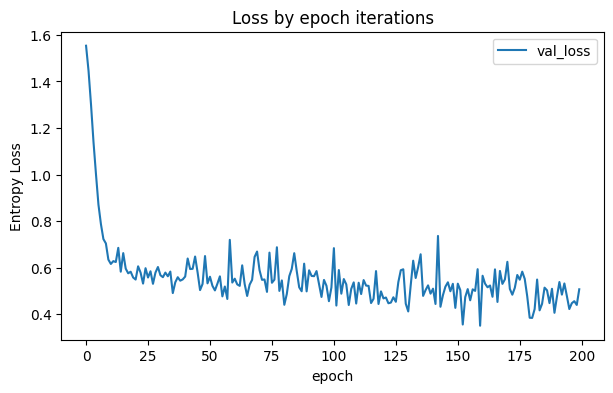

In [ ]:
loss_plt(loss)

In [ ]:
xtest = np.asarray(X_test)

In [ ]:
model

NN(
  (fn1): Linear(in_features=69, out_features=1024, bias=True)
  (bn1): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout1): Dropout(p=0.25, inplace=False)
  (fn2): Linear(in_features=1024, out_features=512, bias=True)
  (bn1_1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout1_1): Dropout(p=0.25, inplace=False)
  (fn2_2): Linear(in_features=512, out_features=256, bias=True)
  (bn2): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout2): Dropout(p=0.25, inplace=False)
  (fn3): Linear(in_features=256, out_features=128, bias=True)
  (bn3): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout3): Dropout(p=0.25, inplace=False)
  (fn4): Linear(in_features=128, out_features=5, bias=True)
)

In [ ]:
# pred_torch =  model(torch.from_numpy(data[0]).float().unsqueeze(0)).max(1, keepdim=True)[1]
res = []
pred_torch =  model(torch.from_numpy(xtest).float()).max(1, keepdim=True)[1]
for i in pred_torch:
    res.append(int(i))

len(res)

357

## эксперимент с эмбеддингами

In [ ]:
# making all variables categorical
for col in X.columns:
    X[col] = X[col].astype('category')

In [ ]:
embedded_cols = {n: len(col.cat.categories) for n,col in X.items() if (len(col.cat.categories) > 1) and (len(col.cat.categories) < 10) }
embedded_cols

{'пациент off/on': 2,
 'определенный диагноз врачом (0-5)': 5,
 'Age_cat_adult': 2,
 'Age_cat_child': 2,
 'Age_cat_elderly': 2,
 'Age_cat_teen': 2}

In [ ]:
embedded_col_names = embedded_cols.keys()
len(X.columns) - len(embedded_cols) #number of numerical columns

63

In [ ]:
X.loc[:,embedded_col_names]

,пациент off/on,определенный диагноз врачом (0-5),Age_cat_adult,Age_cat_child,Age_cat_elderly,Age_cat_teen
0,0,1,1,0,0,0
1,1,0,0,0,1,0
2,1,0,0,0,1,0
3,0,1,0,0,0,1
4,0,2,0,0,0,1
...,...,...,...,...,...,...
828,1,0,0,0,1,0
829,1,3,0,0,1,0
830,0,0,0,0,1,0
831,1,0,0,0,1,0


In [ ]:
embedding_sizes = [(n_categories, min(50, (n_categories+1)//2)) for _,n_categories in embedded_cols.items()]
embedding_sizes

[(2, 1), (5, 3), (2, 1), (2, 1), (2, 1), (2, 1)]

In [ ]:
len(X_val)

167

In [ ]:
class ShelterOutcomeDataset(Dataset):
    def __init__(self, X, Y, embedded_col_names):

        assert len(X) == len(y)

        # X = X.copy()

        # torch.from_numpy(data).float()
        X1 = X.loc[:,embedded_col_names].values.astype(np.int64)
        self.X1 =  torch.from_numpy(X1).float()#categorical columns

        # self.X1 = X.loc[:,embedded_col_names].values.astype(np.int64) #categorical columns
        X2 = X.drop(columns=embedded_col_names).values.astype(np.float32)
        X2 = sc.fit_transform(X2)
        self.X2 = torch.from_numpy(X2).float()
        # self.X2 = X.drop(columns=embedded_col_names).copy().values.astype(np.float32) #numerical columns
        self.y = Y

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return self.X1[idx], self.X2[idx], self.y[idx]


In [ ]:
class NpDataset(Dataset):
    def __init__(self, data, label):
        assert len(data) == len(label)
        self.data = torch.from_numpy(data).float()
        self.label = torch.from_numpy(label).long()

    def __getitem__(self, index):
        return self.data[index], self.label[index]

    def __len__(self):
        return len(self.label)

In [ ]:
train_dataset = ShelterOutcomeDataset(X_train, y_train, embedded_col_names)
test_dataset = ShelterOutcomeDataset(X_val, y_val, embedded_col_names)

AssertionError: ignored

In [ ]:
for i in train_dataset:
    print(i[0].shape)

torch.Size([6])
torch.Size([6])


KeyError: ignored

In [ ]:


train_dataloader = DataLoader(
    train_dataset,
    batch_size=64,
    shuffle=True
)
test_dataloader = DataLoader(
    test_dataset,
    batch_size=64,
    shuffle=False
)

len(train_dataloader.dataset)

666

In [ ]:
#creating train and valid datasets
train_ds = ShelterOutcomeDataset(X_train, y_train, embedded_col_names)
valid_ds = ShelterOutcomeDataset(X_val, y_val, embedded_col_names)

In [ ]:
for i in train_dataloader:
    print(i)
    break

KeyError: ignored

In [ ]:
class ShelterOutcomeModel(nn.Module):
    def __init__(self, embedding_sizes, n_cont):
        super().__init__()
        self.embeddings = nn.ModuleList([nn.Embedding(categories, size) for categories,size in embedding_sizes])
        n_emb = sum(e.embedding_dim for e in self.embeddings) #length of all embeddings combined
        self.n_emb, self.n_cont = n_emb, n_cont
        self.lin1 = nn.Linear(self.n_emb + self.n_cont, 200)
        self.lin2 = nn.Linear(200, 70)
        self.lin3 = nn.Linear(70, 5)
        self.bn1 = nn.BatchNorm1d(self.n_cont)
        self.bn2 = nn.BatchNorm1d(200)
        self.bn3 = nn.BatchNorm1d(70)
        self.emb_drop = nn.Dropout(0.6)
        self.drops = nn.Dropout(0.3)


    def forward(self, x_cat, x_cont):
        x = [e(x_cat[:,i]) for i,e in enumerate(self.embeddings)]
        x = torch.cat(x, 1)
        x = self.emb_drop(x)
        x2 = self.bn1(x_cont)
        x = torch.cat([x, x2], 1)
        x = F.relu(self.lin1(x))
        x = self.drops(x)
        x = self.bn2(x)
        x = F.relu(self.lin2(x))
        x = self.drops(x)
        x = self.bn3(x)
        x = self.lin3(x)
        return x

In [ ]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')

def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device

    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl:
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

device = get_default_device()
device

device(type='cpu')

In [ ]:
model = ShelterOutcomeModel(embedding_sizes, 1)
# model.to(device)

to_device(model, device)

ShelterOutcomeModel(
  (embeddings): ModuleList(
    (0): Embedding(2, 1)
    (1): Embedding(5, 3)
    (2-5): 4 x Embedding(2, 1)
  )
  (lin1): Linear(in_features=9, out_features=200, bias=True)
  (lin2): Linear(in_features=200, out_features=70, bias=True)
  (lin3): Linear(in_features=70, out_features=5, bias=True)
  (bn1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn3): BatchNorm1d(70, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (emb_drop): Dropout(p=0.6, inplace=False)
  (drops): Dropout(p=0.3, inplace=False)
)

In [ ]:
# Optimizer

def get_optimizer(model, lr = 0.001, wd = 0.0):
    parameters = filter(lambda p: p.requires_grad, model.parameters())
    optim = torch.optim.Adam(parameters, lr=lr, weight_decay=wd)
    return optim


In [ ]:
# Training function

def train_model(model, optim, train_dl):
    model.train()
    total = 0
    sum_loss = 0
    for x1, x2, y in train_dl:
        batch = y.shape[0]
        output = model(x1, x2)
        loss = F.cross_entropy(output, y)
        optim.zero_grad()
        loss.backward()
        optim.step()
        total += batch
        sum_loss += batch*(loss.item())
    return sum_loss/total

# Evaluation function

def val_loss(model, valid_dl):
    model.eval()
    total = 0
    sum_loss = 0
    correct = 0
    for x1, x2, y in valid_dl:
        current_batch_size = y.shape[0]
        out = model(x1, x2)
        loss = F.cross_entropy(out, y)
        sum_loss += current_batch_size*(loss.item())
        total += current_batch_size
        pred = torch.max(out, 1)[1]
        correct += (pred == y).float().sum().item()
    print("valid loss %.3f and accuracy %.3f" % (sum_loss/total, correct/total))
    return sum_loss/total, correct/total


In [ ]:
def train_loop(model, epochs, lr=0.01, wd=0.0):
    optim = get_optimizer(model, lr = lr, wd = wd)
    for i in range(epochs):
        loss = train_model(model, optim, train_dl)
        print("training loss: ", loss)
        val_loss(model, valid_dl)


In [ ]:
# convert to an iterator and look at one random sample
dataiter = iter(train_dataloader)
data = next(dataiter)
x1, x2, labels = data
print(features, labels)
print(x1.shape, x2.shape, labels.shape)

KeyError: ignored

In [ ]:
train_dataloader = DataLoader(
    train_ds,
    batch_size=64,
    shuffle=True
)
test_dataloader = DataLoader(
    valid_ds,
    batch_size=64,
    shuffle=False
)

len(train_dataloader.dataset)

666

In [ ]:
# Training

batch_size = 128
train_dl = DataLoader(train_ds, batch_size=batch_size,shuffle=True)
valid_dl = DataLoader(valid_ds, batch_size=batch_size,shuffle=False)

In [ ]:
# train_dl = DeviceDataLoader(train_dl, device)
# valid_dl = DeviceDataLoader(valid_dl, device)

In [ ]:
for i in train_dl:
    print(i)
    break

KeyError: ignored

In [ ]:
train_loop(model, epochs=8, lr=0.05, wd=0.00001)

KeyError: ignored

In [ ]:
X = sc.fit_transform(X)

NameError: ignored